<a href="https://colab.research.google.com/github/wayaadhyasta/analisis_knn_obat/blob/main/Salinan_dari_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Proses Pembangunan Model KNN
# Data Understanding -> Data Cleaning -> Exploratory Data Analysis
# -> Data Preparation -> Modeling

In [ ]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data dalam bentuk DataFrame
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan data uji
from sklearn.neighbors import KNeighborsClassifier  # Untuk membangun model K-Nearest Neighbor (KNN)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Untuk evaluasi model
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi fitur
import seaborn as sns  # Untuk visualisasi data yang lebih menarik

# Membaca dataset dari file CSV
df = pd.read_csv('/content/drive/MyDrive/drug200.csv')  # Mengimpor dataset dari Google Drive ke dalam DataFrame


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


1 Data Understanding

In [ ]:
print('data shape =', df.shape) # Changed code, comma is used to separate the string from df.shape

data shape = (200, 6)


In [ ]:
df.info() # untuk mengetahui data semuanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Menampilkan ringkasan statistik dari data numerik
describe_output = df.describe()  # Menghitung statistik dasar seperti mean, std, min, max, dll.
print(describe_output)  # Menampilkan hasil ringkasan statistik

              Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean    44.315000    0.520000    0.910000     0.485000   16.084485    1.595000
std     16.544315    0.500854    0.821752     0.501029    7.223956    1.716305
min     15.000000    0.000000    0.000000     0.000000    6.269000    0.000000
25%     31.000000    0.000000    0.000000     0.000000   10.445500    0.000000
50%     45.000000    1.000000    1.000000     0.000000   13.936500    1.000000
75%     58.000000    1.000000    2.000000     1.000000   19.380000    4.000000
max     74.000000    1.000000    2.000000     1.000000   38.247000    4.000000


In [ ]:
# Menghitung jumlah kemunculan masing-masing kategori dalam kolom 'Drug'
df.Drug.value_counts() # Menghitung jumlah setiap jenis obat dalam dataset

,count
Drug,
0,91
4,54
1,23
3,16
2,16


In [ ]:
# Menghitung jumlah kemunculan masing-masing kategori dalam kolom 'Sex'
df.Sex.value_counts() # Menghitung jumlah pasien berdasarkan jenis kelamin

,count
Sex,
M,104
F,96


<Axes: xlabel='Age', ylabel='Count'>

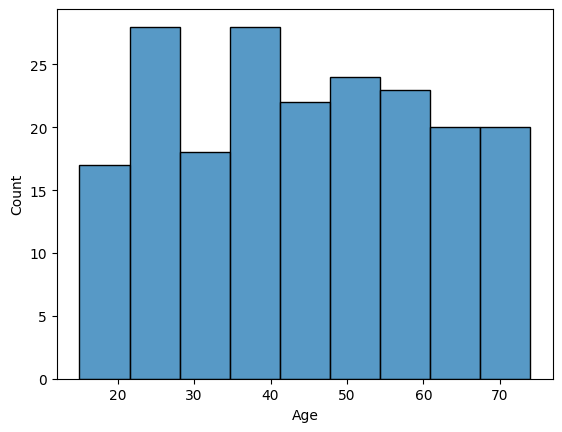

In [ ]:
# Membuat histogram untuk distribusi usia pasien
sns.histplot(df['Age'])

In [ ]:
sns.histplot(df['Age'])  # Membuat histogram menggunakan seaborn
plt.xlabel('Age')  # Memberikan label pada sumbu X
plt.ylabel('Count')  # Memberikan label pada sumbu Y
plt.title('Distribusi Usia Pasien')  # Memberikan judul pada grafik
plt.show()  # Menampilkan grafik

2. Cleaning Data

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
# Untuk menghapus nilai yang sama atau duplicate value
df.duplicated().sum()

0

3. Exploratory Data Analysis (EDA)

<ipython-input-35-2db25ec5d436>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette="flare") # Membuat count plot untuk kolom 'Drug'


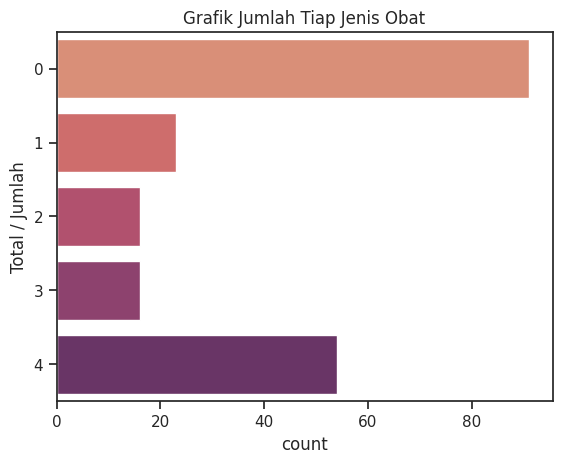

In [ ]:
# Membuat count plot untuk jumlah setiap jenis obat
sns.set_theme(style="ticks")  # Mengatur tema seaborn
sns.countplot(y="Drug", data=df, palette="flare") # Membuat count plot untuk kolom 'Drug'
plt.ylabel("Jenis Obat") # Memberikan label pada sumbu Y
plt.ylabel("Total / Jumlah")  # Memberikan label pada sumbu X
plt.title("Grafik Jumlah Tiap Jenis Obat") # Menambahkan judul grafik
plt.show()

<ipython-input-38-ecd1ebf93c4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="rocket") # Membuat count plot untuk kolom 'Sex'


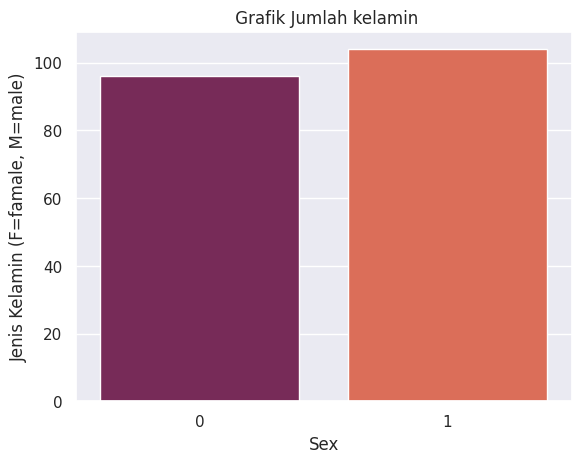

In [ ]:
sns.set_theme(style="darkgrid") # Mengatur tema seaborn
sns.countplot(x="Sex", data=df, palette="rocket") # Membuat count plot untuk kolom 'Sex' sumbu x
plt.ylabel("Jenis Kelamin (F=famale, M=male)") # Membuat label jumlah kelamin dengan sumbu y
plt.title(" Grafik Jumlah kelamin") # Membuat judul grafik
plt.show()

4. Data Preparation

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# encoder merubah tipe data string jadi tipe data int
from sklearn.preprocessing import LabelEncoder #import libary encoder

label_encoder = LabelEncoder()

# build var untuk merubah value yang tipe data string untuk dirubah jadi int
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
# Memisahkan fitur (x) dan target (y)
x = df.drop(columns=['Drug']) # Menghapus kolom 'Drug' untuk digunakan sebagai fitur
y = df['Drug'] # Menyimpan kolom 'Drug' sebagai target/label

print('x : ', x.shape) # Menampilkan ukuran data fitur
print('y : ', y.shape) # Menampilkan ukuran data target

x :  (200, 5)
y :  (200,)


In [ ]:
# Membagi dataset menjadi data latih (train) dan data uji (test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 80% data untuk training, 20% untuk testing

In [ ]:
print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (160, 5)
x_test :  (40, 5)
y_train :  (160,)
y_test :  (40,)


4 Modeling


In [ ]:
# Membuat dan melatih model KNN
knn = KNeighborsClassifier(n_neighbors=3) # Membuat model KNN dengan 3 tetangga terdekat
knn.fit(x_train, y_train) # Melatih model menggunakan data latih

# Memprediksi data uji
y_pred = knn.predict(x_test) # Melakukan prediksi pada data uji

# Menghitung akurasi model
knn_acc = accuracy_score(y_test, y_pred) # Menghitung akurasi model berdasarkan data uji
print(classification_report(y_test, y_pred))
print("Akurasi model KNN: {:.2f}%".format(knn_acc*100)) # Menampilkan hasil akurasi dalam bentuk persentase

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.50      0.67      0.57         3
           3       1.00      0.20      0.33         5
           4       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40

Akurasi model KNN: 77.50%


In [ ]:
testing = {'Age' :[35],
           'Sex': [1],
           'BP':[2],
           'Cholesterol':[1],
           'Na_to_K' :[13.5]
           }
testing = pd.DataFrame(testing)
testing

,Age,Sex,BP,Cholesterol,Na_to_K
0,35,1,2,1,13.5


In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi dari Pasien Baru")
print(pred_coba)

Hasil Prediksi dari Pasien Baru
[4]
